# 585.683 Introduction to Brain Computer Interfaces
## Mod 07 - Brain-Computer Interfacing – Introduction to Brain Computer Interfaces

### Date Submitted: July, DAY, 2022

### Eitan Waks

Answer the following questions using the robintibor/high-gamma-dataset – specifically data/train/1.mat.  Make sure you provide a notebook or source code as an appendix to this assignment.  Again, make sure all plots have labeled axes and meaningful titles.

Hint: You should be able to copy paste and re-use sections from the lecture notebooks provided in this module to complete this assignment with very little coding.

#### Q1.  Preprocess the dataset in one continuous stretch:
##### 1.	Apply a common average reference using all EEG channels (yes, even bad ones if they exist)
##### 2.	For simplicity, don’t decimate the data unless you want to or have to due to memory constraints
##### 3.	Bandpass filter the data between 1.0 and 30 Hz

##### Then plot all channels whose name contains the string “AF” (hint: there’s 11) for two stretches of data.  A 10 second stretch beginning at 200 seconds into the file, and a 10 second stretch starting at 600 seconds into the file. [4 pts each]

##### Which one of these plots contains an artifact, and what is the most likely source of the artifact? [2 pts]

In [4]:
# imports
import mne
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import braindecode
from braindecode.datasets.bbci import  BBCIDataset


In [5]:
# Paths
dataset_name = '1'
dataset_filetype = 'edf'
repository = 'BCI_MOD7_HW'
app_dir = Path('/', 'app')
data_dir = app_dir.joinpath('data')
notebook_dir = app_dir.joinpath(repository)
data_file = data_dir.joinpath(f'{dataset_name}.{dataset_filetype}')

In [6]:
# Loading this dataset

# Set up Montage -- Channel names in this file adhere to 10-05
montage = mne.channels.make_standard_montage( 'standard_1005' )

sensors = BBCIDataset.get_all_sensors( data_file )
load_sensors = set( sensors ) & set( montage.ch_names )
raw = BBCIDataset(
    filename = data_file,
    load_sensor_names = list( load_sensors )
).load()

raw.set_channel_types( { name: 'eeg' for name in load_sensors } )
raw.set_montage( montage )

# Let's re-reference to the common average using MNE
raw.set_eeg_reference( 'average' );

Creating RawArray with float64 data, n_channels=128, n_times=1225545
    Range : 0 ... 1225544 =      0.000 ...  2451.088 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


C:\Users\eitan\AppData\Local\Temp\ipykernel_11208\1339539903.py:13: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFF1, AFF2, AFF5h, AFF6h, AFp3h, AFp4h, AFz, C1, C2, C3, C4, C5, C6, CCP1h, CCP2h, CCP3h, CCP4h, CCP5h, CCP6h, CP1, CP2, CP3, CP4, CP5, CP6, CPP1h, CPP2h, CPP3h, CPP4h, CPP5h, CPP6h, CPz, Cz, F1, F2, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FCC1h, FCC2h, FCC3h, FCC4h, FCC5h, FCC6h, FCz, FFC1h, FFC2h, FFC3h, FFC4h, FFC5h, FFC6h, FFT7h, FFT8h, FT10, FT7, FT8, FT9, FTT10h, FTT7h, FTT8h, FTT9h, Fp1, Fp2, Fpz, Fz, I1, I2, Iz, M1, M2, O1, O2, OI1h, OI2h, Oz, P1, P10, P2, P3, P4, P5, P6, P7, P8, P9, PO10, PO3, PO4, PO5, PO6, PO7, PO8, PO9, POO10h, POO3h, POO4h, POO9h, POz, PPO1, PPO10h, PPO2, PPO5h, PPO6h, PPO9h, Pz, T7, T8, TP7, TP8, TPP10h, TPP7h, TPP8h, TPP9h, TTP7h, TTP8h has changed from NA to V.
  raw.set_channel_types( { name: 'eeg' for name in load_sensors } )


In [10]:
raw.info['events'][0:5]
fs = raw.info['sfreq']

Timebase in samples: [-500 -499 -498 ... 1497 1498 1499]
Timebase in seconds: [-1.    -0.998 -0.996 ...  2.994  2.996  2.998]
['F5', 'M1', 'O1', 'CP6', 'CCP6h', 'M2', 'CPP2h', 'F6', 'P3', 'CPz', 'C2', 'CCP2h', 'AFF1', 'POO9h', 'PO5', 'TPP10h', 'FFC3h', 'FFC5h', 'AFF6h', 'FT7', 'FFT7h', 'Cz', 'C1', 'FTT7h', 'CCP4h', 'PO10', 'C3', 'POO10h', 'T7', 'FTT10h', 'CPP4h', 'TPP7h', 'PO6', 'FCC4h', 'P9', 'F7', 'F3', 'CPP3h', 'Fp2', 'TP7', 'FCC5h', 'FT10', 'Oz', 'O2', 'P5', 'FT9', 'Pz', 'FT8', 'POO4h', 'P2', 'CCP1h', 'C4', 'FFC4h', 'POz', 'PO3', 'C5', 'P1', 'FCC6h', 'Iz', 'CPP6h', 'PO8', 'P10', 'TTP7h', 'T8', 'FC5', 'CP2', 'PPO9h', 'POO3h', 'Fpz', 'CP3', 'F8', 'FCC3h', 'CCP3h', 'PPO2', 'TPP8h', 'PPO1', 'FFC2h', 'P4', 'FTT8h', 'CP5', 'FFC6h', 'PO9', 'CP4', 'PPO5h', 'FFC1h', 'FC2', 'FC4', 'FCC1h', 'PO4', 'PPO6h', 'AFF5h', 'FC3', 'P7', 'FC1', 'CCP5h', 'FTT9h', 'AF8', 'OI1h', 'F4', 'AF3', 'CP1', 'C6', 'I2', 'FCz', 'AF4', 'AFp3h', 'AFz', 'FC6', 'FFT8h', 'TTP8h', 'CPP1h', 'PO7', 'FCC2h', 'PPO10h', 'TP8'

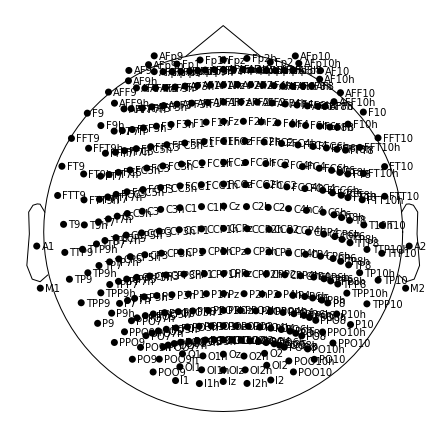

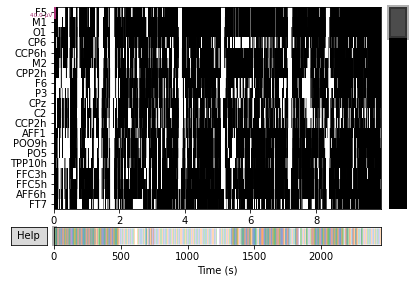

In [11]:
ch_map = {f'A{i+1}': ch for i, ch in enumerate(montage.ch_names)}
timebase_samp = np.arange( int( fs * -1.0 ), int( fs * 3.0 ) )
timebase_sec = timebase_samp / fs
print( 'Timebase in samples:', timebase_samp )
print( 'Timebase in seconds:', timebase_sec )
print(raw.ch_names)
print(montage.ch_names)
montage.plot();
raw.plot();

#### Q2. Following the preprocessing previously applied in Q1, segment trials from -1.0 to +3.0 seconds around the event timestamps in the dataset events structure, and plot the trial-average (mean) timeseries for “Cz”, “C3”, “C4, “Pz”, and “Oz”, without regard to trial type (i.e., including all trial types) [2 pts per plot.]